### This is the project related to personal_loan in one of the Southeast Asia Financial Technology Company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("application.csv")

### check data that is imported

In [6]:
col_list = loan.columns.tolist()
print(col_list)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [5]:
loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
pd.set_option("display.max_rows", 122) #use pd.set.option() to maximize the list of column types
loan.dtypes                            #pd.set_option("display.max_rows") or ("display.max_columns")

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [13]:
## more easier way
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(62), int64(44), object(16)
memory usage: 3.3+ MB


In [14]:
loan.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS_E

In [15]:
# get basic statistics from "AMT_CREDIT" and "NAME_CONTRACT_TYPE" variables
loan["AMT_CREDIT"].describe()

count    3.551000e+03
mean     6.028647e+05
std      4.037052e+05
min      4.500000e+04
25%      2.736360e+05
50%      5.099220e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [18]:
loan["AMT_CREDIT"].describe(percentiles =[.1, .25, .5, .75, .90, .99])  #different percentiles

count    3.551000e+03
mean     6.028647e+05
std      4.037052e+05
min      4.500000e+04
10%      1.800000e+05
25%      2.736360e+05
50%      5.099220e+05
75%      8.086500e+05
90%      1.133748e+06
99%      1.945899e+06
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [19]:
loan["NAME_CONTRACT_TYPE"].describe()

count           3551
unique             2
top       Cash loans
freq            3210
Name: NAME_CONTRACT_TYPE, dtype: object

In [20]:
loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3551.000000,3551.000000,3551.000000,3.551000e+03,3.551000e+03,3551.000000,3.550000e+03,3551.000000,3551.000000,3551.000000,...,3551.000000,3551.000000,3551.000000,3551.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,102073.344128,0.079977,0.405238,1.688150e+05,6.028647e+05,27245.390031,5.432948e+05,0.021041,-16068.529992,65432.273162,...,0.006477,0.000563,0.000563,0.000282,0.010131,0.008497,0.035294,0.259804,0.274510,1.889542
std,1199.429620,0.271297,0.716773,9.996192e+04,4.037052e+05,14548.286638,3.724547e+05,0.014160,4347.082715,142618.849778,...,0.080230,0.023729,0.023729,0.016781,0.103369,0.122333,0.194891,0.924487,0.615643,1.862963
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101018.500000,0.000000,0.000000,1.125000e+05,2.736360e+05,16753.500000,2.385000e+05,0.010006,-19643.000000,-2721.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102077.000000,0.000000,0.000000,1.440000e+05,5.099220e+05,25101.000000,4.500000e+05,0.018850,-15871.000000,-1206.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,103108.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34868.250000,6.795000e+05,0.028663,-12421.000000,-283.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,104147.000000,1.000000,7.000000,1.935000e+06,2.517300e+06,135936.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,16.000000,4.000000,11.000000


In [21]:
# to check the distinct descriptive variables
loan["NAME_CONTRACT_TYPE"].unique()               #there are two different types of this variables

array(['Cash loans', 'Revolving loans'], dtype=object)

In [22]:
# check how many distinct types for this variables
loan["NAME_CONTRACT_TYPE"].nunique()

2

In [23]:
# count how many data entries each type appears
loan["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         3210
Revolving loans     341
Name: NAME_CONTRACT_TYPE, dtype: int64

### Clean data

In [24]:
# check number of null data from different variables
loan.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    1
NAME_TYPE_SUITE                   11
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     2352
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [25]:
# Find how many data entries for distinct variables under "OCCUPATION_TYPE" 
loan["OCCUPATION_TYPE"].value_counts(dropna = False)

NaN                      1109
Laborers                  622
Sales staff               392
Core staff                315
Managers                  232
Drivers                   226
High skill tech staff     126
Accountants               114
Medicine staff            105
Security staff             80
Cooking staff              73
Cleaning staff             41
Private service staff      34
Low-skill Laborers         32
Secretaries                18
Waiters/barmen staff        9
Realty agents               9
HR staff                    8
IT staff                    6
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
# if there is a data entry with all missing values, delete this data entry (the original dataframe wiil not be changed)
loan.dropna(how = "all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [30]:
loan.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [31]:
# delete useless columns
loan.drop(columns = "TARGET")

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,661500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,900000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,81000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [32]:
loan_new = loan.copy()

In [35]:
# deep copy
loan_new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [36]:
# find how many applicants for each loans how many SK_ID_CURR in each loan
loan.groupby(["NAME_CONTRACT_TYPE"])["SK_ID_CURR"].count()

NAME_CONTRACT_TYPE
Cash loans         3210
Revolving loans     341
Name: SK_ID_CURR, dtype: int64

In [40]:
# average income in different careers grouped by loans
pd.DataFrame(loan.groupby(["NAME_CONTRACT_TYPE", "OCCUPATION_TYPE"], as_index = False)["AMT_INCOME_TOTAL"].mean())

,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL
0,Cash loans,Accountants,197622.094737
1,Cash loans,Cleaning staff,137096.052632
2,Cash loans,Cooking staff,142891.304348
3,Cash loans,Core staff,172917.218750
4,Cash loans,Drivers,201311.483254
5,Cash loans,HR staff,178901.250000
6,Cash loans,High skill tech staff,188871.710526
7,Cash loans,IT staff,292500.000000
8,Cash loans,Laborers,166546.691489
9,Cash loans,Low-skill Laborers,136446.428571


In [43]:
# get all the statistics from different columns
loan.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT'].agg(['sum', 'mean', 'max', 'count','nunique'])

<ipython-input-43-047b4ba11d85>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT'].agg(['sum', 'mean', 'max', 'count','nunique'])


AMT_INCOME_TOTAL                 \
                                                      sum           mean   
NAME_CONTRACT_TYPE OCCUPATION_TYPE                                         
Cash loans         Accountants                 18774099.0  197622.094737   
                   Cleaning staff               5209650.0  137096.052632   
                   Cooking staff                9859500.0  142891.304348   
                   Core staff                  49800159.0  172917.218750   
                   Drivers                     42074100.0  201311.483254   
                   HR staff                     1073407.5  178901.250000   
                   High skill tech staff       21531375.0  188871.710526   
                   IT staff                     1170000.0  292500.000000   
                   Laborers                    93932334.0  166546.691489   
                   Low-skill Laborers           3820500.0  136446.428571   
                   Managers                    52997985.0  262366.262376   
                   Medicine staff              13667850.0  145402.659574   
                   Private service staff        5557500.0  168409.090909   
                   Realty agents                1665000.0  237857.142857   
                   Sales staff                 52290630.0  152450.816327   
                   Secretaries                  2458633.5  144625.500000   
                   Security staff              10476000.0  147549.295775   
                   Waiters/barmen staff         1516500.0  189562.500000   
Revolving loans    Accountants                  3478500.0  183078.947368   
                   Cleaning staff                346500.0  115500.000000   
                   Cooking staff                 553500.0  138375.000000   
                   Core staff                   4279500.0  158500.000000   
                   Drivers                      3582000.0  210705.882353   
                   HR staff                      787500.0  393750.000000   
                   High skill tech staff        1912500.0  159375.000000   
                   IT staff                      585000.0  292500.000000   
                   Laborers                     8038890.0  138601.551724   
                   Low-skill Laborers            472500.0  118125.000000   
                   Managers                     8799664.5  293322.150000   
                   Medicine staff               1768500.0  160772.727273   
                   Private service staff         135000.0  135000.000000   
                   Realty agents                 450000.0  225000.000000   
                   Sales staff                  6498000.0  132612.244898   
                   Secretaries                   202500.0  202500.000000   
                   Security staff               1185750.0  131750.000000   
                   Waiters/barmen staff           90000.0   90000.000000   

                                                                   \
                                                max count nunique   
NAME_CONTRACT_TYPE OCCUPATION_TYPE                                  
Cash loans         Accountants             540000.0    95      37   
                   Cleaning staff          405000.0    38      20   
                   Cooking staff           292500.0    69      22   
                   Core staff              540000.0   288      54   
                   Drivers                 810000.0   209      43   
                   HR staff                360000.0     6       5   
                   High skill tech staff   630000.0   114      37   
                   IT staff                450000.0     4       4   
                   Laborers                630000.0   564      63   
                   Low-skill Laborers      225000.0    28      16   
                   Managers               1350000.0   202      49   
                   Medicine staff          382500.0    94      32   
                   Private service staff 

In [46]:
# practice: calculate mean and number of distinct values of SK_ID_CURR and AMT_CREDIT under CODE_GENDER
# Put the result into Analysis_GENDER
pd.DataFrame(loan.groupby(["CODE_GENDER"], as_index = False)["SK_ID_CURR", "AMT_CREDIT"].agg(["mean", "nunique"]))

<ipython-input-46-ae26bd3c3ff5>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(loan.groupby(["CODE_GENDER"], as_index = False)["SK_ID_CURR", "AMT_CREDIT"].agg(["mean", "nunique"]))


SK_ID_CURR             AMT_CREDIT        
                      mean nunique           mean nunique
CODE_GENDER                                              
F            102104.950876    2341  595766.247117     841
M            102012.194215    1210  616598.047934     518

In [49]:
# use python to get the average amount of credit grouped by contract type which FLAG_OWN_CAR is true
Final = pd.DataFrame(loan.loc[loan["FLAG_OWN_CAR"] == "Y"].groupby("NAME_CONTRACT_TYPE", as_index = False)["AMT_CREDIT"].mean())
Final

,NAME_CONTRACT_TYPE,AMT_CREDIT
0,Cash loans,705002.068727
1,Revolving loans,383673.913043


In [50]:
# create a dataframe, to get data CODE_GENDER is false orLAG_OWN_CAR is N
test = pd.DataFrame(loan.loc[(loan["CODE_GENDER"] == "F") | (loan["CODE_GENDER"] == "F")])
test

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,104141,0,Cash loans,F,N,Y,0,787500.0,2085120.0,72607.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
3545,104142,0,Cash loans,F,N,Y,0,90000.0,625536.0,32067.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# create new variables
loan['HIGH_INCOME'] = loan['AMT_INCOME_TOTAL']>600000

In [52]:
loan["HIGH_INCOME"].value_counts()

False    3530
True       21
Name: HIGH_INCOME, dtype: int64

In [53]:
income_by_target= pd.DataFrame(loan.groupby("TARGET", as_index = False)["AMT_INCOME_TOTAL"].mean())
income_by_target

,TARGET,AMT_INCOME_TOTAL
0,0,169709.203292
1,1,158528.551056


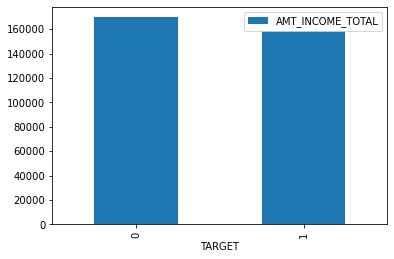

In [54]:
# bar chart
my_plot = income_by_target.plot(x="TARGET", y="AMT_INCOME_TOTAL",kind="bar")

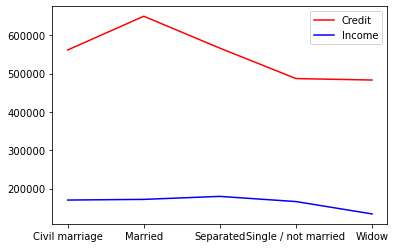

In [56]:
fig, ax = plt.subplots()
ax.plot(loan.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean(), color='red', label='Credit')
ax.plot(loan.groupby(['NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean(), color='blue', label='Income')
ax.legend()
plt.show()

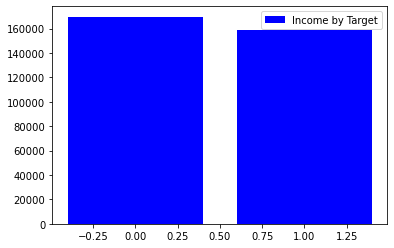

In [57]:
fig, ax = plt.subplots()
ax.bar(loan.groupby("TARGET")["AMT_INCOME_TOTAL"].mean().index,
       loan.groupby("TARGET")["AMT_INCOME_TOTAL"].mean(), color='blue', label='Income by Target')
ax.legend()
plt.show()

In [59]:
# finally, export the data to csv file
income_by_target.to_csv('income_by_target_withoutindex.csv')